<h1>Run everything</h1>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import random

In [2]:
global W_3,B_3,W_2,B_2,W_1,B_1
try:
    W_3=np.load('W_3.npy')
    W_2=np.load('W_2.npy')
    W_1=np.load('W_1.npy')
    B_3=np.load('B_3.npy')
    B_2=np.load('B_2.npy')
    B_1=np.load('B_1.npy')
except:
    print("One or more file not found for paramters")

In [3]:
def sig(x):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = 1 / (1 + np.exp(-x))
    return result

def d_sig(x):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = (sig(x)*(1-sig(x)))
    return result

def get_predicitons(A3):
    #if A3 is
    # 0.3 0.5 1.2 ... 
    # 0.4 0.1 0.6 ...  ^
    # 0.2 1.3 0.4 ...  | axis 0 max value index
    #gives[1,2,0] perdictions of each column
    return np.argmax(A3,0)

def network_function_test(X):
    global W_3,B_3,W_2,B_2,W_1,B_1
    A_0 = X
    Z_1 = W_1@A_0 +B_1
    A_1 = sig(Z_1)
    Z_2 = W_2@A_1 +B_2
    A_2 = sig(Z_2)
    Z_3 = W_3@A_2 +B_3 
    #A_3 is actual output
    A_3 = sig(Z_3)
    return A_3    

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [4]:
data= pd.read_csv("./test.csv")
data = data.to_numpy()
n,m = data.shape
X_test = data.T

Prediction:  [1]


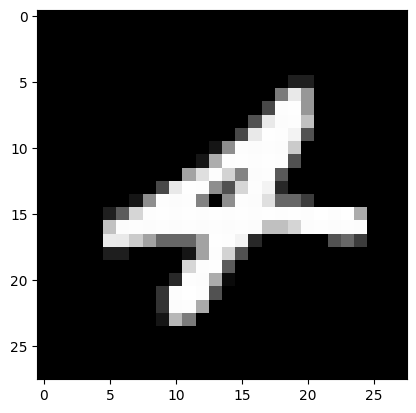

In [9]:
m1,n1 = X_test.shape
index =  random.randint(0,n1) #get nth data set from test set
plot_data = X_test[:,index].reshape(28,28)
X_data = X_test[:,index].reshape(m1,1) #we need values along columns
A_3_OUT = network_function_test(X_data)
print("Prediction: ",get_predicitons(A_3_OUT))
plot_data = plot_data * 255
plt.gray()
plt.imshow(plot_data,interpolation="nearest")
plt.show()